In [1]:
import pandas as pd
import json
from nltk.stem.porter import PorterStemmer
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer, TfidfVectorizer
import numpy as np

from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA, TruncatedSVD, KernelPCA

import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

from sklearn.metrics import *
from mlxtend import plotting 

%matplotlib inline 

In [2]:
print(nltk.__version__)

3.2.4


In [3]:
!head -n 1 data/imdb-comments.json

{"label":"test","sentiment":"pos","name":"0_10.txt","content":"I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge."}


In [4]:
data = []
with open("data/imdb-comments.json", "r") as f:
    for l in f.readlines():
        data.append(json.loads(l))    

In [5]:
comments = pd.DataFrame.from_dict(data)
comments.sample(25)

,content,label,name,sentiment
17353,The movie contains a very short scene of Deneu...,test,3118_1.txt,neg
46001,Can I Do it 'till I Need Glasses? at the very ...,train,6401_1.txt,neg
23105,Uggh! Hanna-Barbera of the 60s and 70s! What l...,test,8296_2.txt,neg
2477,Watching the preview of Armored I thought the ...,test,1222_8.txt,pos
39910,The genre of suspense films really takes a div...,train,1216_3.txt,neg
2239,'Night Crossing' is about an enormous barrier ...,test,12015_8.txt,pos
6495,"As social satire, Idiocracy is just as good as...",test,4597_7.txt,pos
41590,As a Turkish man now living in Sweden I must c...,train,2431_1.txt,neg
47417,I stopped watching lost at this episode becaus...,train,7677_4.txt,neg
17971,It seems that there is great potential for the...,test,3675_1.txt,neg


In [6]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
content      50000 non-null object
label        50000 non-null object
name         50000 non-null object
sentiment    50000 non-null object
dtypes: object(4)
memory usage: 1.5+ MB


In [7]:
comments.label.value_counts()

train    25000
test     25000
Name: label, dtype: int64

In [8]:
comments.groupby(["label", "sentiment"]).content.count().unstack()

sentiment,neg,pos
label,,
test,12500,12500
train,12500,12500


In [9]:
v = list(comments["content"].sample(1))[0]
v

"You don't have to spend much time watching this made for TV movie or series pilot or whatever it was intended to be to figure out just what lies in store. The incredibly bad musical score makes its debut from the start. Seriously, if this isn't the worst theme I've ever heard, I certainly can't remember it. While the acting talent is available here, from Jeff Bridges to Carl Betz, Vera Miles, and Sal Mineo, the writing is atrocious and the story is contrived, filled with insipid stereotypes, and an obvious ripoff from Ken Kesey. Why must Hollywood always present tales from the sixties as if the so-called hippies were all unidimensional morons? It's too bad that such an interesting era in our exceptionally conformist social experience is generally depicted by out and out garbage so that the least offensive of the genre is now accepted as reasonably authentic when almost none of it comes even close to the way things really were. The best I've seen to date is a memoir called Looking Back

In [10]:
def preprocess(text):
    text = BeautifulSoup(text, "html5lib").text.lower() #removed html tags
    text = re.sub("[\W]+", " ", text)
    return text

preprocess(v)

'you don t have to spend much time watching this made for tv movie or series pilot or whatever it was intended to be to figure out just what lies in store the incredibly bad musical score makes its debut from the start seriously if this isn t the worst theme i ve ever heard i certainly can t remember it while the acting talent is available here from jeff bridges to carl betz vera miles and sal mineo the writing is atrocious and the story is contrived filled with insipid stereotypes and an obvious ripoff from ken kesey why must hollywood always present tales from the sixties as if the so called hippies were all unidimensional morons it s too bad that such an interesting era in our exceptionally conformist social experience is generally depicted by out and out garbage so that the least offensive of the genre is now accepted as reasonably authentic when almost none of it comes even close to the way things really were the best i ve seen to date is a memoir called looking back by a guy name

In [11]:
comments["content"] = comments["content"].apply(preprocess)

In [12]:
comments_train = comments[comments["label"] == "train"]
comments_train.sample(10)

,content,label,name,sentiment
32265,if you want to be cynical and pedantic you cou...,train,528_9.txt,pos
49576,silly simplistic and short gun crazy volume 1 ...,train,961_1.txt,neg
28245,rock solid giallo from a master filmmaker of t...,train,1671_8.txt,pos
33844,sabrina the teenage witch was one of my favori...,train,6710_10.txt,pos
48379,i am working my way through the chilling class...,train,8542_2.txt,neg
44692,shamefull as it may be this movie actually mad...,train,5223_1.txt,neg
38978,giant is one of the most boring overly long h...,train,11330_4.txt,neg
39645,olivier gruner stars as jacques a foreign exch...,train,11931_2.txt,neg
48171,wanda nevada is a pubescent fantasy movie usin...,train,8355_2.txt,neg
36714,before i start i should point out that i know ...,train,9294_7.txt,pos


In [13]:
comments_test = comments[comments["label"] == "test"]
comments_test.sample(10)

,content,label,name,sentiment
15720,perfect double bill for the horribly corny bev...,test,1649_2.txt,neg
18170,what a turd i like john leguizamo but man this...,test,3854_1.txt,neg
13541,oh my oh this is a really bad movie the acting...,test,10938_1.txt,neg
2580,an exquisite film they just don t make them li...,test,12322_8.txt,pos
16614,i watched about an hour of this movie against ...,test,2453_1.txt,neg
899,i saw this film at the 2004 toronto internatio...,test,1080_8.txt,pos
9300,there are few films that deal with things that...,test,7120_10.txt,pos
22299,this has to be one of the most awfully scripte...,test,7570_2.txt,neg
14867,this movie was pure genius john waters is bril...,test,12130_1.txt,neg
13169,i thought this movie was horrible i was bored ...,test,10602_2.txt,neg


In [14]:
X_train = comments_train["content"].values
y_train = comments_train["sentiment"].apply(lambda v: 1 if v == "pos" else 0)

In [15]:
X_test = comments_test["content"].values
y_test = comments_test["sentiment"].apply(lambda v: 1 if v == "pos" else 0)

In [16]:
# http://snowball.tartarus.org/algorithms/porter/stemmer.html
porter = PorterStemmer()
for s in "revival allowance inference relational".split():
    print(s, porter.stem(s))

revival reviv
allowance allow
inference infer
relational relat


In [19]:
stop = stopwords.words("english")
tfidf = TfidfVectorizer(tokenizer=porter.stem, ngram_range=(1, 1), stop_words = stop)

docs = ["The sun is shining", "The weather is sweet", "the sun is shining and the weather is sweet"]
print("TFIDF matrix: \n", tfidf.fit_transform(docs).toarray())
print("Vocabulary: ", tfidf.vocabulary_)

TFIDF matrix: 
 [[ 0.6354  0.2118  0.      0.4236  0.5455  0.      0.2727  0.    ]
 [ 0.4409  0.7349  0.      0.294   0.      0.1893  0.      0.3785]
 [ 0.6419  0.4814  0.1358  0.3209  0.4133  0.1033  0.1033  0.2066]]
Vocabulary:  {'h': 3, 'e': 1, ' ': 0, 'u': 6, 'n': 4, 'w': 7, 'r': 5, 'g': 2}


In [20]:
X_train_tfidf = tfidf.fit_transform(X_train)

In [23]:
X_test_tfidf = tfidf.transform(X_test)

In [24]:
pca = TruncatedSVD(n_components=2, random_state=0, n_iter=100)
X_train_pca = pca.fit_transform(X_train_tfidf)

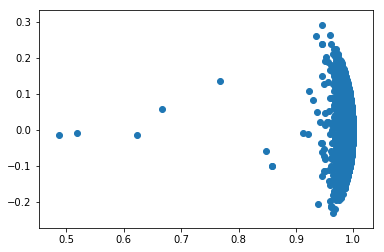

In [25]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])

In [26]:
X_train_pca.shape

(25000, 2)

In [27]:
pca.explained_variance_ratio_

array([ 0.0045,  0.2316])

In [28]:
lgx = LogisticRegression(C = 10, random_state = 0)
lgx.fit(X_train_tfidf, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
y_test_pred = lgx.predict(X_test_tfidf)

In [30]:
print("accuracy: ", accuracy_score(y_test, y_test_pred), 
      "\nprecision: ", precision_score(y_test, y_test_pred), 
      "\nrecall: ", recall_score(y_test, y_test_pred), 
      "\nf1:", f1_score(y_test, y_test_pred))

accuracy:  0.61104 
precision:  0.613361646521 
recall:  0.6008 
f1: 0.607015842224


(<matplotlib.figure.Figure at 0x1178c68d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1179a9550>)

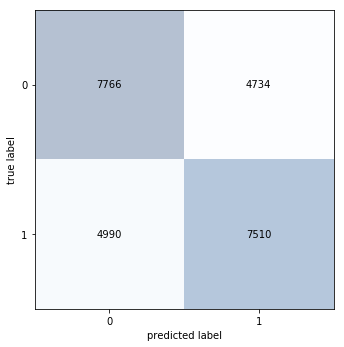

In [31]:
plotting.plot_confusion_matrix(confusion_matrix(y_test, y_test_pred), figsize=(5.5, 5.5))

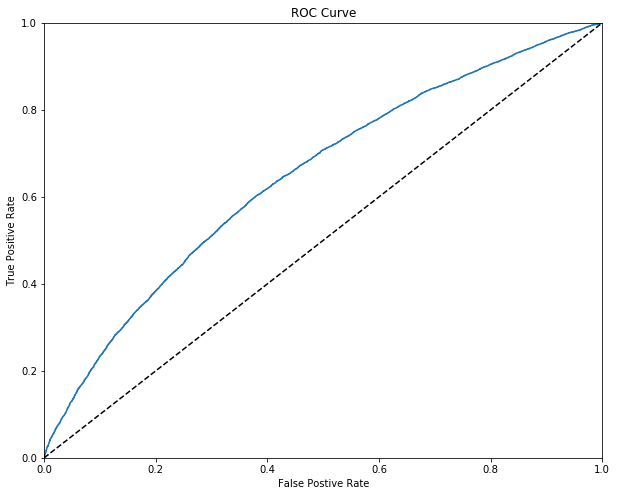

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, lgx.predict_proba(X_test_tfidf)[:, [1]])

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.plot([0,1], [0,1], ls = "--", color = "k")
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")